In [19]:
!python tools/analysis_tools/analyze_logs.py \
    plot_curve work_dirs/hrsid_deformable-detr_r50_sar/vis_data.json \
    --keys loss_cls loss_bbox \
    --legend loss_cls loss_bbox \
    --out work_dirs/hrsid_deformable-detr_r50_sar/losses.png

plot curve of work_dirs/hrsid_deformable-detr_r50_sar/vis_data.json, metric is loss_cls
plot curve of work_dirs/hrsid_deformable-detr_r50_sar/vis_data.json, metric is loss_bbox
save curve to: work_dirs/hrsid_deformable-detr_r50_sar/losses.png


In [1]:
!python tools/analysis_tools/analyze_logs.py \
    plot_curve work_dirs/hrsid_deformable-detr_r50_sar/vis_data.json \
    work_dirs/hrsid_dino_r50_sar/20250223_215231/vis_data/20250223_215231.json \
    work_dirs/hrsid_fcos_r50_sar/20250224_142615/vis_data/20250224_142615.json \
    work_dirs/hrsid_frcnn_r50_sar/20250223_040147/vis_data/20250223_040147.json \
    work_dirs/hrsid_retinanet_r50_sar/20250224_150239/vis_data/20250224_150239.json \
    --keys loss_bbox \
    --legend Deformable-DETR DINO FCOS Faster-RCNN RetinaNet \
    --out work_dirs/hrsid_deformable-detr_r50_sar/comparison_bbox.png \
    --title 'loss_bbox of different detectors'

plot curve of work_dirs/hrsid_deformable-detr_r50_sar/vis_data.json, metric is loss_bbox
plot curve of work_dirs/hrsid_dino_r50_sar/20250223_215231/vis_data/20250223_215231.json, metric is loss_bbox
plot curve of work_dirs/hrsid_fcos_r50_sar/20250224_142615/vis_data/20250224_142615.json, metric is loss_bbox
plot curve of work_dirs/hrsid_frcnn_r50_sar/20250223_040147/vis_data/20250223_040147.json, metric is loss_bbox
plot curve of work_dirs/hrsid_retinanet_r50_sar/20250224_150239/vis_data/20250224_150239.json, metric is loss_bbox
save curve to: work_dirs/hrsid_deformable-detr_r50_sar/comparison_bbox.png


In [22]:
!python tools/analysis_tools/get_flops.py \
    cfg_distill/flops/hrsid_deformable-detr_mobv2.py

loading annotations into memory...
Done (t=0.17s)
creating index...
index created!
/root/miniconda3/envs/DETR/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
03/08 16:39:38 - mmengine - WARNING - Unsupported operator aten::hardtanh_ encountered 35 time(s)
03/08 16:39:38 - mmengine - WARNING - Unsupported operator aten::add encountered 96 time(s)
03/08 16:39:38 - mmengine - WARNING - Unsupported operator aten::new_ones encountered 1 time(s)
03/08 16:39:38 - mmengine - WARNING - Unsupported operator aten::fill_ encountered 1 time(s)
03/08 16:39:38 - mmengine - WARNING - Unsupported operator aten::rsub encountered 10 time(s)
03/08 16:39:38 - mmengine - WARNING - Unsupported operator aten::cumsum encountered 9 time(s)
03/08 16:39:38 - mmengin

In [47]:
!python -m torch.distributed.launch --nproc_per_node=1 --master_port=29500 tools/analysis_tools/benchmark.py \
    cfg_distill/flops/hrsid_deformable-detr_mobv2.py \
    --launcher pytorch

/root/miniconda3/envs/DETR/lib/python3.8/site-packages/torch/distributed/launch.py:181: FutureWarning: The module torch.distributed.launch is deprecated
and will be removed in future. Use torchrun.
Note that --use-env is set by default in torchrun.
If your script expects `--local-rank` argument to be set, please
change it to read from `os.environ['LOCAL_RANK']` instead. See 
https://pytorch.org/docs/stable/distributed.html#launch-utility for 
further instructions

  warnings.warn(
/root/miniconda3/envs/DETR/lib/python3.8/site-packages/mmengine/utils/dl_utils/setup_env.py:26: UserWarning: Multi-processing start method `fork` is different from the previous setting `spawn`.It will be force set to `fork`. You can change this behavior by changing `mp_start_method` in your config.
  warnings.warn(
03/08 17:24:52 - mmengine - INFO - before build: 
03/08 17:24:52 - mmengine - INFO - (GB) mem_used: 35.63 | uss: 0.38 | pss: 0.46 | total_proc: 1
loading annotations into memory...
Done (t=0.16s)
c

In [4]:
!python tools/test.py \
    local_configs/HRSID/hrsid_deformable-detr_r50_sar.py \
    work_dirs/hrsid_deformable-detr_r50_sar/best_coco_bbox_mAP_epoch_50.pth \
    --show-dir  vis_imgs

03/09 18:39:48 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.8.20 (default, Oct  3 2024, 15:24:27) [GCC 11.2.0]
    CUDA available: True
    numpy_random_seed: 2112147701
    GPU 0: NVIDIA GeForce RTX 4090
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: gcc (Ubuntu 11.3.0-1ubuntu1~22.04) 11.3.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_5

In [11]:
!python tools/analysis_tools/browse_dataset.py \
    local_configs/HRSID/hrsid_deformable-detr_r50_sar.py \
    --output-dir work_dirs/gt/HRSID_test

loading annotations into memory...
Done (t=0.16s)
creating index...
index created!
/root/miniconda3/envs/DETR/lib/python3.8/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '
[                                ] 1/1961, 5.5 task/s, elapsed: 0s, ETA:   354s/root/miniconda3/envs/DETR/lib/python3.8/site-packages/mmengine/visualization/visualizer.py:760: UserWarning: Warning: The bbox is out of bounds, the drawn bbox may not be in the image
  warnings.warn(
/root/miniconda3/envs/DETR/lib/python3.8/site-packages/mmengine/visualization/visualizer.py:831: UserWarning: Warning: The polygon is out of bounds, the drawn polygon may not be in the image
  warnings.warn(
[>>                           ] 193/1961, 5.3 task/s, elapsed: 37s, ETA:   337s/root/miniconda3/envs/DETR/lib/python3.8/site-packages/mmengine/

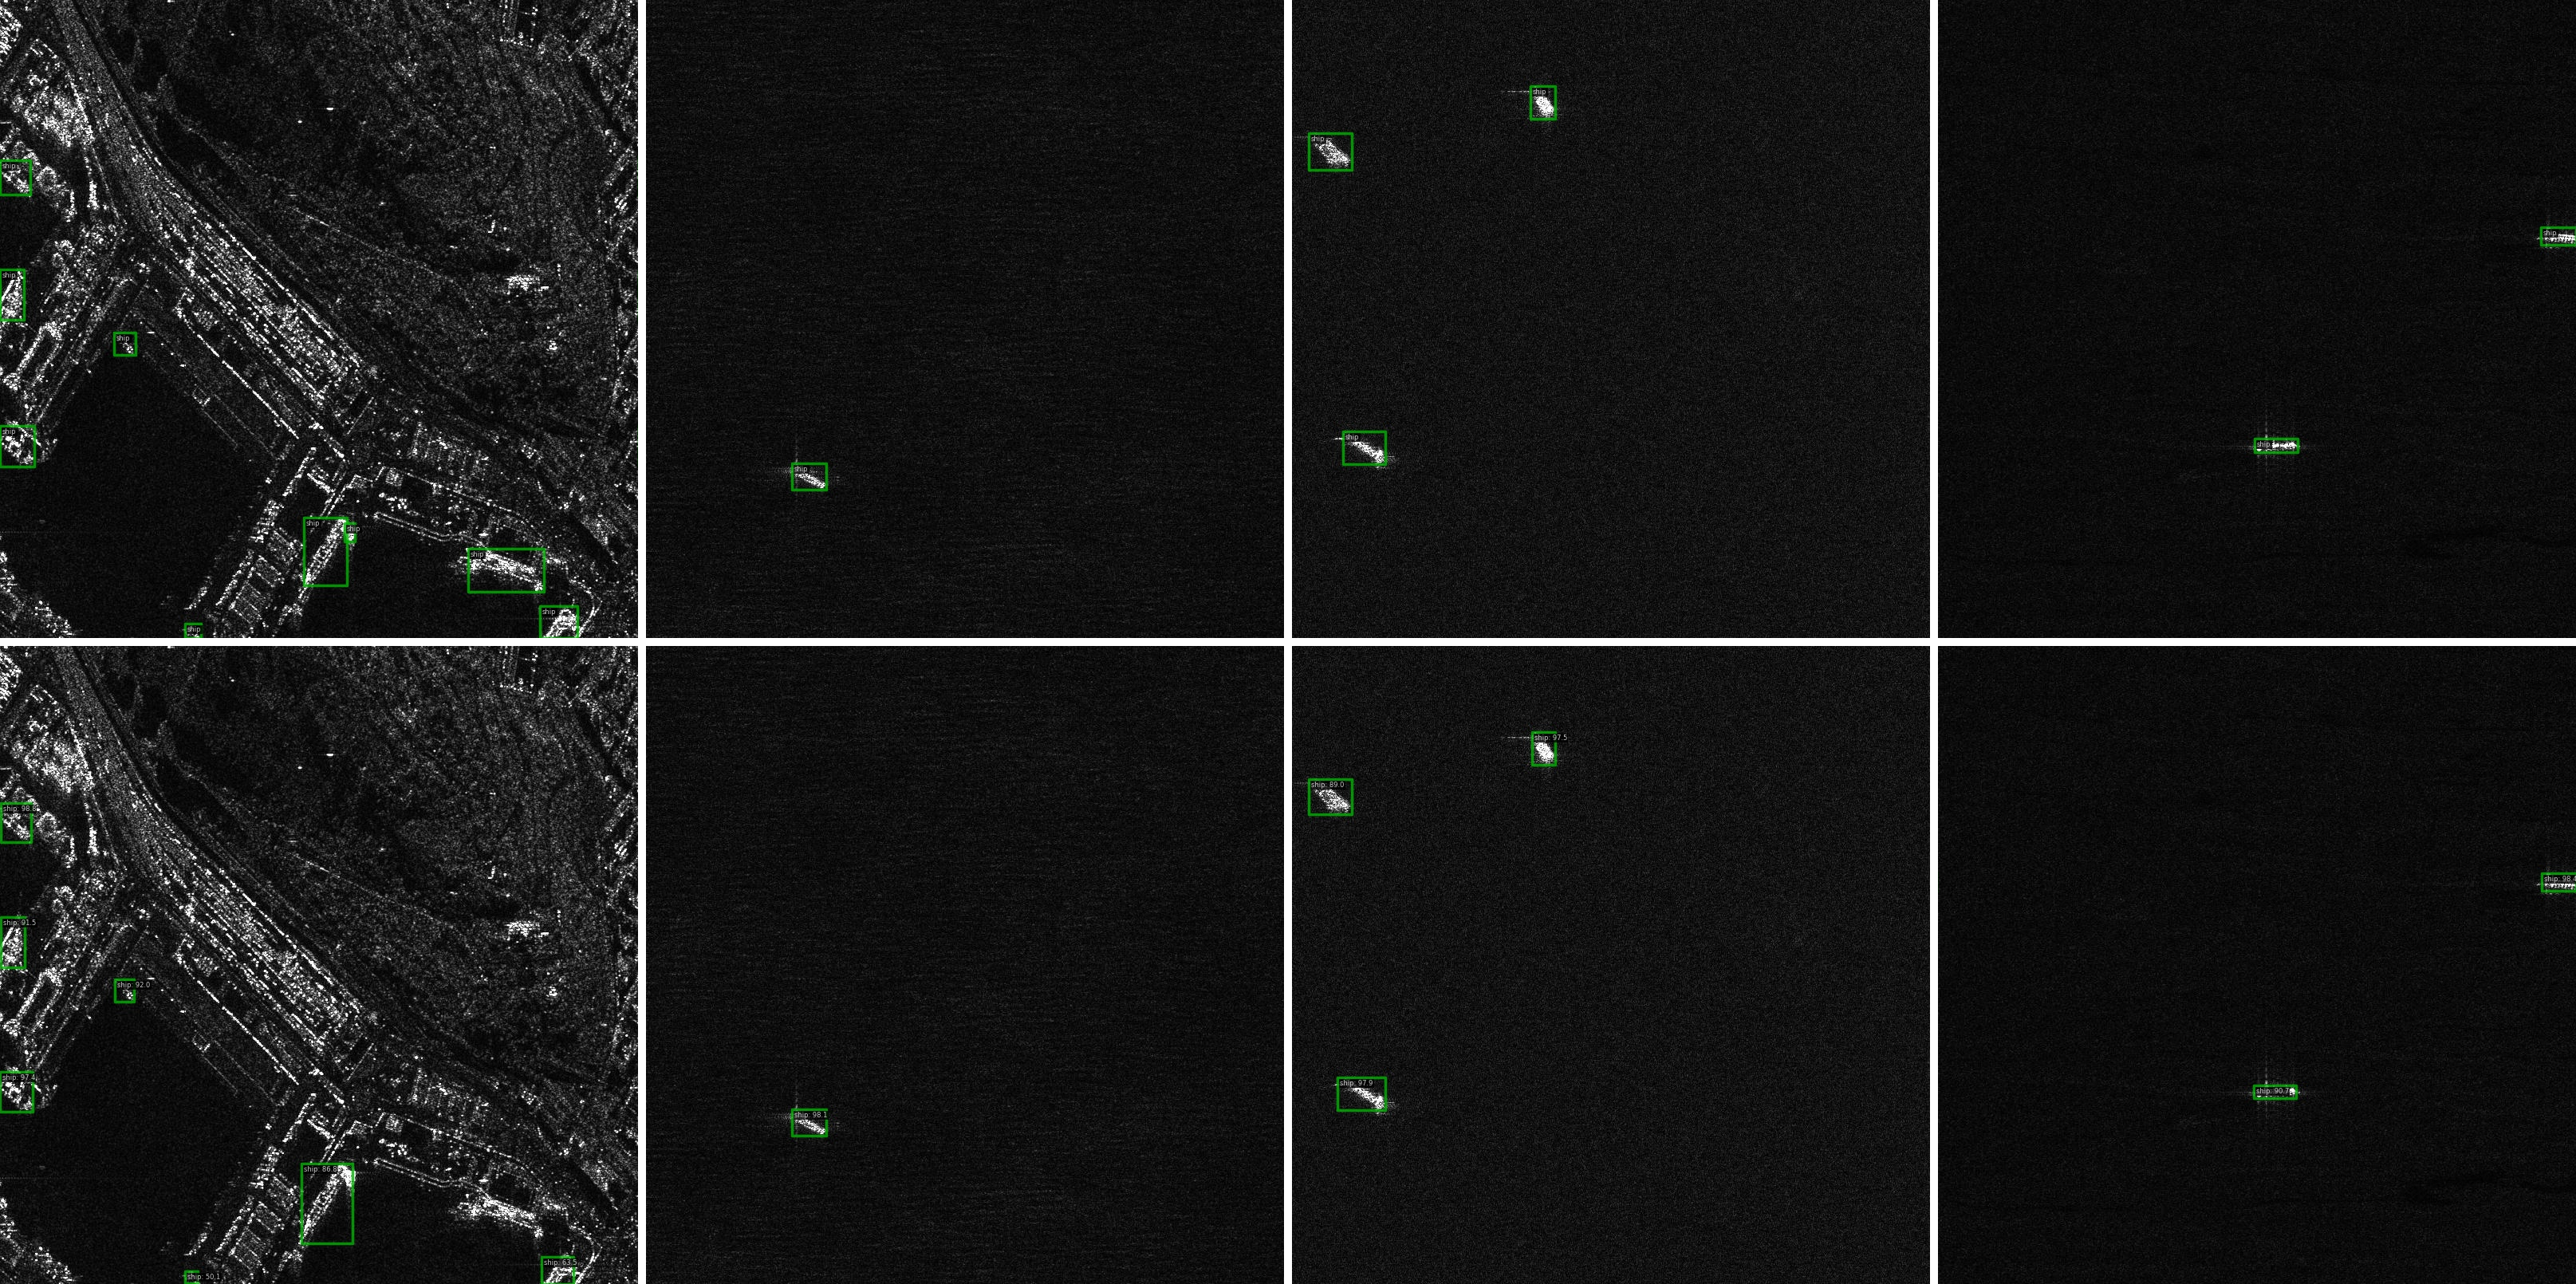

In [27]:
from PIL import Image
import glob
import random

# 设置空白间隔（单位：像素）
gap = 10

# 1. 获取所有图像路径（请根据实际路径修改）
image_paths = glob.glob("work_dirs/hrsid_deformable-detr_r50_sar/20250309_183947/vis_imgs/*.jpg")  # 可根据需要更改扩展名

# 随机抽取4张图像
selected_paths = random.sample(image_paths, 4)

left_halves = []
right_halves = []

# 2. 遍历每个选中的图像，分割左右两半
for path in selected_paths:
    img = Image.open(path)
    width, height = img.size
    # 假设图像尺寸为 1600x800
    if width != 1600 or height != 800:
        raise ValueError(f"图像尺寸不匹配：{path} 的尺寸为 {width}x{height}")
    # 分割：左半部分区域：(left, upper, right, lower) = (0, 0, 800, 800)
    left = img.crop((0, 0, 800, height))
    right = img.crop((800, 0, width, height))
    left_halves.append(left)
    right_halves.append(right)

# 3. 创建两个空白画布，分别用于拼接左半部分和右半部分
# 每排宽度 = 4张图片宽度 + 3个间隔
row_width = 800 * 4 + gap * 3
row_height = 800

top_row = Image.new("RGB", (row_width, row_height), color=(255, 255, 255))      # 第一排：4个800x800横向拼接
bottom_row = Image.new("RGB", (row_width, row_height), color=(255, 255, 255))   # 第二排

# 将每张图像的左半部分依次粘贴到第一排，间隔 gap 像素
for i, part in enumerate(left_halves):
    x = i * (800 + gap)
    top_row.paste(part, (x, 0))

# 将每张图像的右半部分依次粘贴到第二排，间隔 gap 像素
for i, part in enumerate(right_halves):
    x = i * (800 + gap)
    bottom_row.paste(part, (x, 0))

# 4. 创建最终的图像画布，将两个拼接好的排垂直拼接
# 总高度 = 两排高度 + 中间 gap
final_width = row_width
final_height = row_height * 2 + gap

final_image = Image.new("RGB", (final_width, final_height), color=(255, 255, 255))
final_image.paste(top_row, (0, 0))
final_image.paste(bottom_row, (0, row_height + gap))

# 保存或显示最终结果
final_image.save("output_matrix.png")
final_image.show()

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def add_title_and_labels_matplotlib(
    image_path,
    output_path,
    title_text="这是主标题",
    top_label="上半部分标签",
    bottom_label="下半部分标签"
):
    # 1. 读取图像
    img = mpimg.imread('output_matrix.png')
    
    # 2. 创建绘图窗口
    fig, ax = plt.subplots()
    
    # 3. 显示图像
    ax.imshow(img)
    
    # 4. 关闭坐标轴（如果不需要坐标轴的话）
    ax.axis('off')
    
    # 5. 获取图像的高度和宽度
    #    注意：如果图像是灰度图，可能没有第三维度，此时需要根据实际情况做处理
    height, width, _ = img.shape
    
    # 6. 设置主标题（放在图像上方）
    #    - 默认情况下，plt.title() 的文字颜色是黑色，如果背景是深色，可以改为白色
    plt.title(title_text, fontsize=10, color='black')
    
    # 7. 反转 y 轴，使得 y=0 在图像顶部、y=height 在图像底部
    ax.invert_yaxis()
    
    # 8. 在图像上半部分左侧添加标签
    #    - x=10 表示从左侧边缘 10 像素处开始
    #    - y=height * 0.25 表示距离顶部 25% 的高度处（因为已 invert_yaxis，y=0 在顶部）
    ax.text(
        -225,                  # x 坐标
        height * 0.25,       # y 坐标
        top_label,           # 文本内容
        color='black',       # 文字颜色
        fontsize=10,         # 字号
        ha='left',           # 水平对齐方式（left/center/right）
        va='center'          # 垂直对齐方式（top/center/bottom）
    )
    
    # 9. 在图像下半部分左侧添加标签
    ax.text(
        -250,
        height * 0.75,
        bottom_label,
        color='black',
        fontsize=10,
        ha='left',
        va='center'
    )

    ax.invert_yaxis()
    
    # 10. 保存结果（可根据需要调整分辨率、边距等）
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.close()

if __name__ == "__main__":
    add_title_and_labels_matplotlib(
        image_path="image.png",           # 输入图像路径
        output_path="image_with_text.png",# 输出图像路径
        title_text="Visualization of Detection",        # 主标题 
        top_label="GT",
        bottom_label="Pred"
    )
